# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [14]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')

In [16]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [17]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [19]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [20]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Contamos con valores ausentes en las sigientes columnas:

- Orders (days_since_prior_order - 28819).
- Products (product_name - 1258) .
- Order_products (add_to_cart_order - 836).



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

### Plan de solución 

1. **Verificación y corrección de tipos de datos**:
   - Revisar los tipos de datos de cada columna en los DataFrames.
   - Convertir las columnas de ID a enteros si no lo están.
   - Asegurarse de que las columnas categóricas tengan el tipo de dato adecuado.

2. **Identificación y manejo de valores ausentes**:
   - Identificar las columnas con valores ausentes en cada DataFrame.
   - Analizar el contexto de los valores ausentes para decidir cómo manejarlos:
     - Reemplazar valores ausentes con un valor predeterminado 
     - Imputar valores ausentes con valores lógicos 
     - Documentar cualquier decisión tomada.

3. **Identificación y eliminación de duplicados**:
   - Revisar si hay filas duplicadas en cada DataFrame.
   - Analizar las filas duplicadas para determinar si deben eliminarse.
   - Eliminar duplicados y documentar las razones detrás de esta decisión.

4. **Validación de datos**:
   - Verificar que los datos sean consistentes después del preprocesamiento.
   - Asegurarse de que no queden valores ausentes o duplicados no deseados.
   - Confirmar que los tipos de datos sean correctos y que los rangos de valores sean razonables.

5. **Preparación para el análisis**:
   - Guardar los DataFrames limpios y listos para el análisis exploratorio.
   - Documentar los cambios realizados en cada paso para futuras referencias.
    

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [21]:
# Revisa si hay pedidos duplicados
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

¿Qué sugiere este resultado?

    Los duplicados detectados muestran un patrón temporal consistente (miércoles 2AM), indicando probable origen técnico relacionado con procesos automatizados o mantenimiento del sistema durante esa ventana horaria.
    

In [22]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders.query('order_dow == 3 and order_hour_of_day == 2').duplicated().sum()

15

In [23]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

In [24]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [25]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

    El 12% de las facturas generadas el día miércoles a las 2 am son repetidas lo cual fueron eliminadas.  

### `products` data frame

In [26]:
# Verifica si hay filas totalmente duplicadas
products[products.duplicated()].sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: object

In [27]:
# Revisa únicamente si hay ID de productos duplicados
products['product_id'].duplicated().sum()

0

In [28]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products[products['product_name'].str.upper().duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,Biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [29]:
# Revisa si hay nombres duplicados de productos no faltantes
products['product_name'].dropna().str.upper().duplicated().sum()

104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Se detectaron 104 nombres repetidos por errores ortográficos (no son valores nulos). Se conservan sin cambios

### `departments` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
departments[departments.duplicated()].sum()

department_id    0
department       0
dtype: object

In [31]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    No contamos con valores duplicados, no se realiza acción 

### `aisles` data frame

In [32]:
# Revisa si hay filas totalmente duplicadas
aisles[aisles.duplicated()].sum()

aisle_id    0
aisle       0
dtype: object

In [33]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    No contamos con valores duplicados, no se realiza acción 

### `order_products` data frame

In [34]:
# Revisa si hay filas totalmente duplicadas
order_products[order_products.duplicated()].sum()

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [35]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products.duplicated(['order_id','product_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    No contamos con valores duplicados, no se realiza acción 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [36]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
    
    Contamos con 1258 valores ausentes en la columna de product name
    

In [37]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products['product_name'].isna()]['aisle_id'].value_counts()

aisle_id
100    1258
Name: count, dtype: int64

Describe brevemente cuáles son tus hallazgos.

    Todos los valores ausentes pertenecen al pasillo número 100

In [38]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products['product_name'].isna()]['department_id'].value_counts()

department_id
21    1258
Name: count, dtype: int64

Describe brevemente cuáles son tus hallazgos.

    Todos los valores nulos pertenecen al departamento número 21

In [39]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_missing = products[
    (products['department_id'] == 21) & 
    (products['aisle_id'] == 100) & 
    (products['product_name'].isna())
]
# Muestra el resultado
df_missing

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Se identificaron 1,258 productos con las siguientes características:

    Departamento: 21 (etiquetado como 'NaN')

    Pasillo: 100 (etiquetado como 'NaN')

    Nombre de producto: No disponible (valores nulos o vacíos)  

In [40]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
products['product_name'].value_counts().head(5)


product_name
Unknown                                  1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
Name: count, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Se ejecutó un proceso de limpieza en la columna product_name donde los valores nulos (NaN) fueron reemplazados por el texto "Unknown".

### `orders` data frame

In [41]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [42]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orders[
    (orders['days_since_prior_order'].isna()) & 
    (~orders['order_number'] == 1)].shape)

(0, 6)


In [43]:
orders = orders.fillna(0)
orders.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Todos los valores ausentes vienen de la primera compra

    
    

### `order_products` data frame

In [44]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [45]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_val, max_val = order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()
print(f"Orden mínimo en carrito: {min_val}")
print(f"Orden máximo en carrito: {max_val}")   

Orden mínimo en carrito: 1.0
Orden máximo en carrito: 64.0


Describe brevemente cuáles son tus hallazgos.
   
    Existen 836 valores ausentes (NaN) en la columna add_to_cart_order, 
    
    Los valores no nulos van desde 1 hasta 64, lo que sugiere que el campo representa el orden en que se agregaron productos al carrito (1 = primer producto, 64 = último).



In [46]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# ¿Cuántos pedidos tienen un valor ausente en 'add_to_cart_order'?
missing_order_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [47]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_orders_product_count = order_products[order_products['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count()

print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos?: {(missing_orders_product_count > 64).all()}")
print(f"Mínimo de productos: {missing_orders_product_count.min()}")
print(f"Total de pedidos con valores ausentes: {len(missing_orders_product_count)}")

¿Todos los pedidos con valores ausentes tienen más de 64 productos?: False
Mínimo de productos: 1
Total de pedidos con valores ausentes: 70


Describe brevemente cuáles son tus hallazgos.

    Se identificaron 70 pedidos únicos con valores ausentes en add_to_cart_order. Sin embargo, no todos estos pedidos tienen más de 64 productos; el pedido con el menor número de productos tiene solo 1 artículo.    

In [48]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

    Se decidió reemplazar los NaN con 999 (un valor fuera del rango normal 1-64) y convertir la columna a entero, con la finalidad de mantener los registros sin eliminarlos e dentificar fácilmente los casos atípicos (999) en análisis posteriores. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


        Se realizó una limpieza efectiva de los datos, eliminando duplicados (como los pedidos repetidos por errores técnicos) y manejando valores ausentes mediante imputaciones lógicas:

        product_name (nulos) → "Unknown"

        days_since_prior_order (nulos) → 0 (primera compra).

        add_to_cart_order (nulos) → 999 (para diferenciarlos del rango normal 1-64).

    Se verificó la calidad de los datos (rangos, tipos de datos y consistencia), asegurando que estén listos para análisis sin distorsiones. Los valores nulos en add_to_cart_order no siguieron un patrón claro, pero su imputación con 999 permite identificarlos fácilmente en futuros estudios.
    
    El preprocesamiento de los datos permitió identificar y corregir problemas clave, como duplicados, valores ausentes y tipos de datos inconsistentes. Estas acciones aseguran que los datos estén limpios y listos para el análisis exploratorio y la generación de insights.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [49]:
# Mostrar el número de registros con valores fuera de rango
out_of_range_count = orders[~orders['order_dow'].between(0, 6) | ~orders['order_hour_of_day'].between(0, 23)].shape[0]
print(f"Número de registros fuera de rango: {out_of_range_count}")

Número de registros fuera de rango: 0


Escribe aquí tus conclusiones

    Los datos son consistentes y no presentan valores anómalos en estas columnas.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

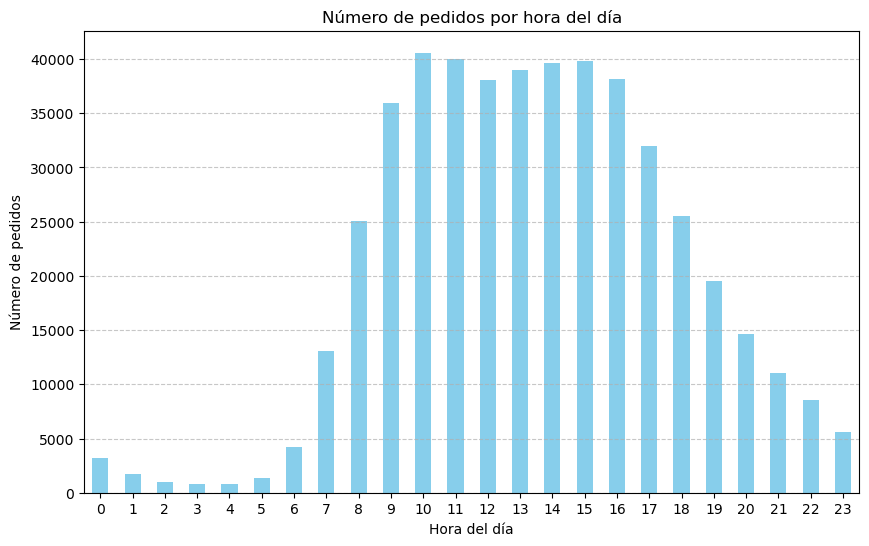

In [50]:
hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar', color='skyblue')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

        Existen horas pico en las que se realizan más pedidos, probablemente relacionadas con los horarios en los que los usuarios están más activos, como las mañanas o las tardes. Por otro lado, las horas de menor actividad, como la madrugada, muestran una baja en el número de pedidos.

    El comportamiento puede estar relacionado con los hábitos alimenticios y horarios de consumo ya que los usuarios tienden a realizar más pedidos durante estos momentos del día.

### [A3] ¿Qué día de la semana compran víveres las personas?

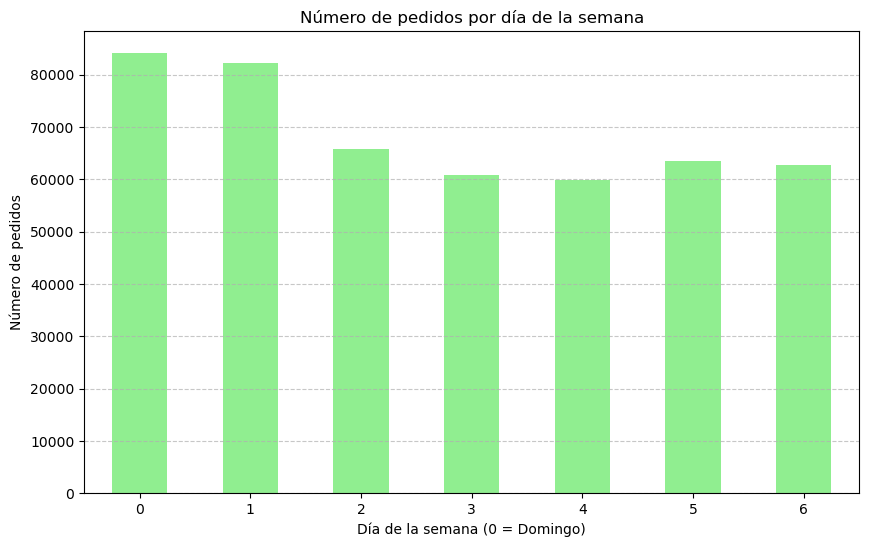

In [51]:
dow_orders = orders['order_dow'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
dow_orders.plot(kind='bar', color='lightgreen')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana (0 = Domingo)')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

        Domingo y lunes son los días que registran más pedidos

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

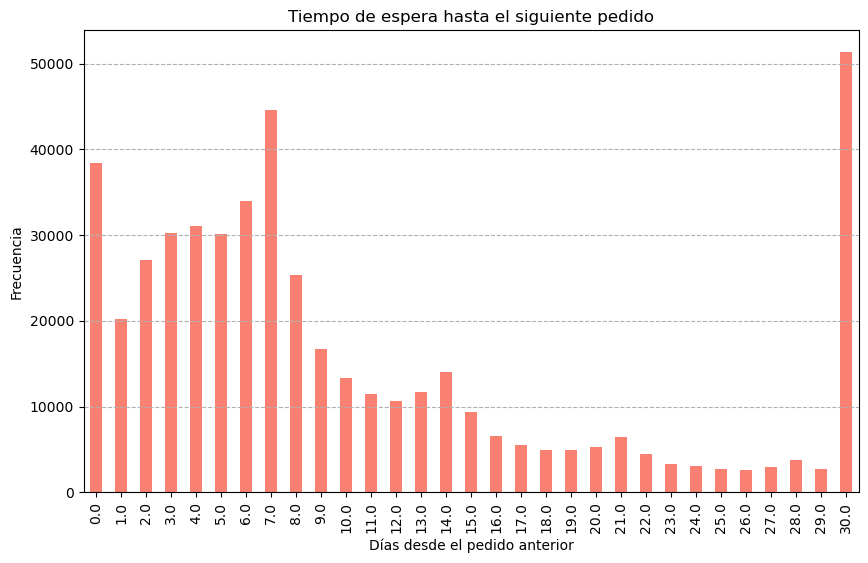

In [52]:
plt.figure(figsize=(10, 6))
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Tiempo de espera hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--')
plt.show()

In [53]:
top_days = orders['days_since_prior_order'].value_counts(ascending=False).head(10)

top_days 

days_since_prior_order
30.0    51337
7.0     44577
0.0     38406
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
Name: count, dtype: int64

Escribe aquí tus conclusiones

     Los datos revelan tres perfiles principales: compradores mensuales, semanales y frecuentes, así también muestran que hay un segmento significativo de clientes que compra cada 2–6 días.
    

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

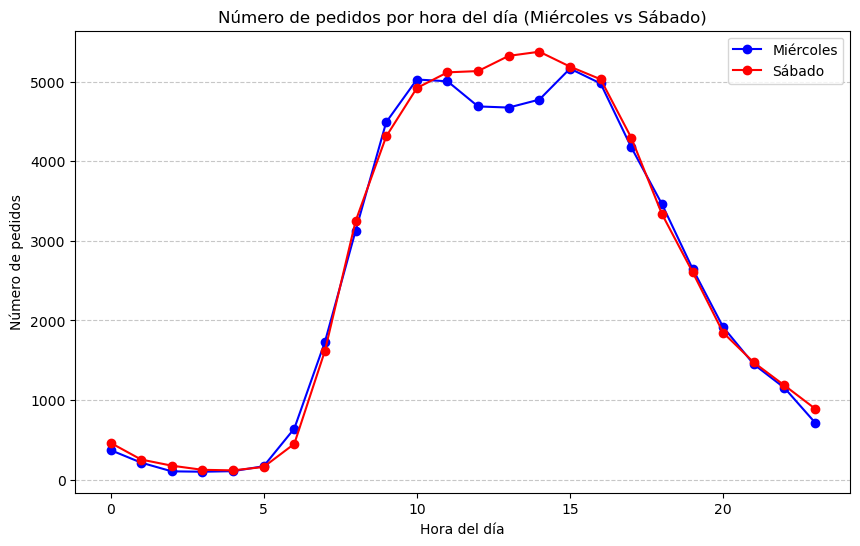

In [54]:
# Filtrar los datos para miércoles y sábados
wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(wednesday_orders.index, wednesday_orders.values, marker='o', label='Miércoles', color='blue')
plt.plot(saturday_orders.index, saturday_orders.values, marker='o', label='Sábado', color='red')
plt.title('Número de pedidos por hora del día (Miércoles vs Sábado)')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

    En el comportamiento del número de pedidos, podemos observar que los miércoles y sábados presentan patrones distintos en las horas pico. Los miércoles tienden a tener un flujo más constante de pedidos durante el día, mientras que los sábados muestran un aumento más pronunciado en las horas de la mañana y la tarde, probablemente debido a que más personas realizan compras durante el fin de semana. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

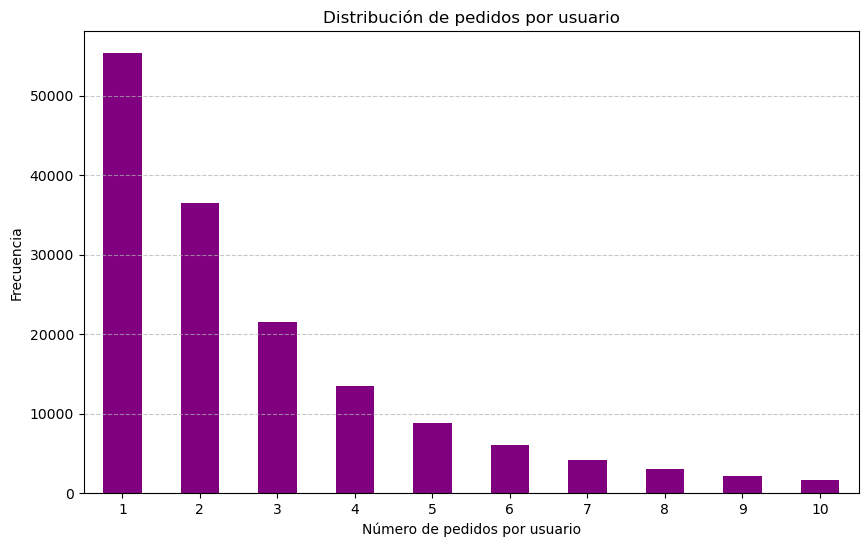

In [55]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

# Calcular la distribución de frecuencias
distribution = orders_per_user.value_counts()

# Mostrar la distribución
plt.figure(figsize=(10, 6))
distribution.head(10).sort_index().plot(kind='bar', color='purple')
plt.title('Distribución de pedidos por usuario')
plt.xlabel('Número de pedidos por usuario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

# Calcular la distribución de frecuencias
distribution = orders_per_user.value_counts()

# Mostrar la distribución
distribution.head(10)

order_id
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
Name: count, dtype: int64

Escribe aquí tus conclusiones

    Los usuarios realizan un número reducido de pedidos, mientras que un grupo más pequeño de usuarios realiza pedidos con mayor frecuencia. Esto sugiere que existe una base de clientes ocasionales y otra más comprometida que utiliza la plataforma de manera recurrente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

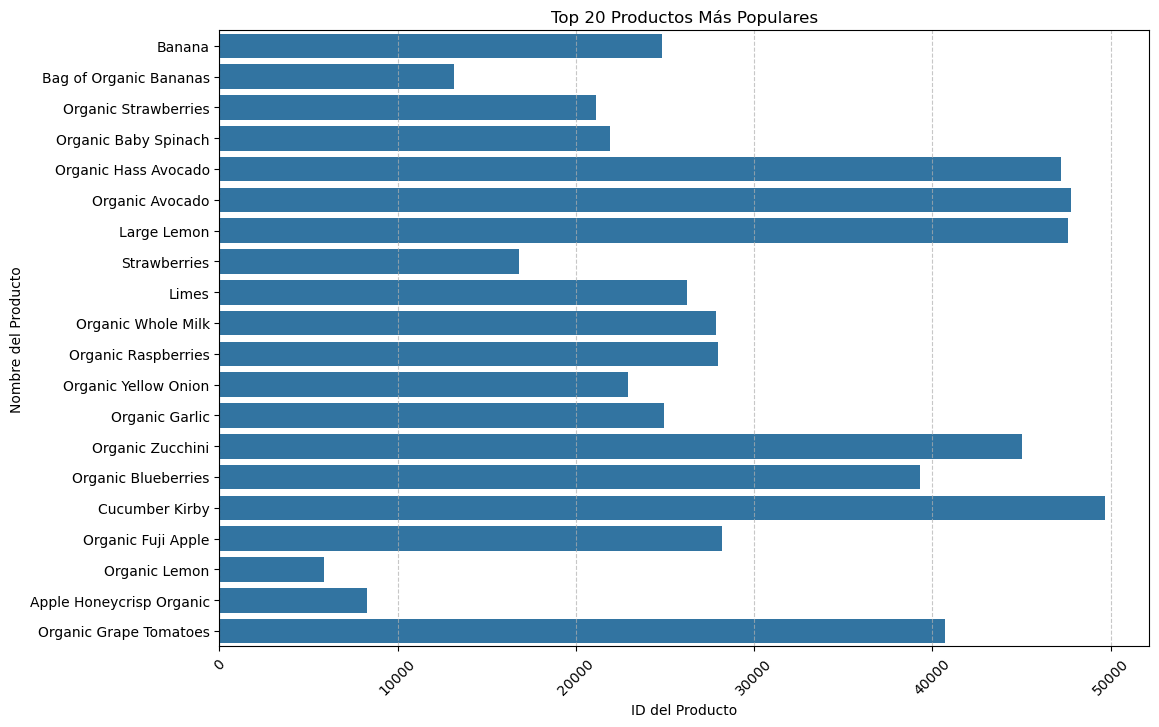

,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,47626,Large Lemon
7,16797,Strawberries
8,26209,Limes
9,27845,Organic Whole Milk


In [63]:
#¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?
popular_products = order_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20)
popular_products = popular_products.reset_index().merge(products, on='product_id')[['product_id', 'product_name']]

#graficar los 20 productos más populares
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_products, x='product_id', y='product_name')
plt.title('Top 20 Productos Más Populares')
plt.xlabel('ID del Producto')
plt.ylabel('Nombre del Producto')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

popular_products.head(20)

Escribe aquí tus conclusiones

    Los resultados muestran que los productos más populares corresponden a bienes de consumo recurrente y perecederos, como alimentos básicos y productos de uso diario. Esto indica que los usuarios tienden a realizar compras frecuentes de artículos esenciales, reflejando patrones de consumo predecibles. 
    

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


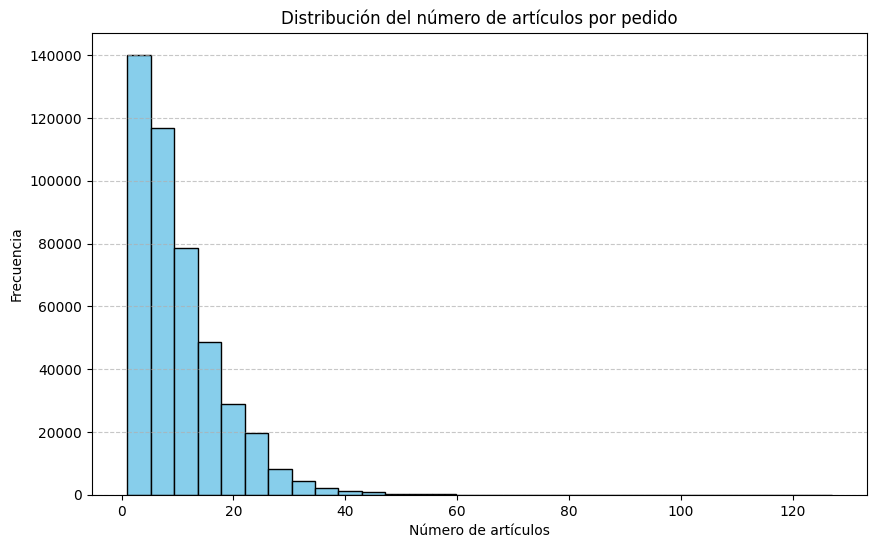

In [ ]:
# Agrupar por 'order_id' y contar cuántos productos hay en cada pedido
order_sizes = order_products.groupby('order_id')['product_id'].count()

# Mostrar estadísticas descriptivas
print(order_sizes.describe())

# Graficar la distribución
plt.figure(figsize=(10, 6))
order_sizes.plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

    Los resultados muestran que el tamaño promedio de los pedidos es de aproximadamente 10 artículos, con una desviación estándar de 7.54, lo que indica una variabilidad significativa en el número de productos por pedido. El tamaño mínimo de un pedido es de 1 artículo, mientras que el máximo es de 127. El 25% de los pedidos contienen 5 artículos o menos, el 50% (mediana) tienen 8 artículos, y el 75% incluyen hasta 14 artículos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
#¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
reordered_products = (
    order_products.query('reordered == 1')
    .groupby('product_id')
    .size()
    .nlargest(20)
    .reset_index(name='order_count')
    .merge(products, on='product_id')
    .filter(['product_id', 'product_name', 'order_count'])
)

reordered_products 

,product_id,product_name,order_count
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


<Figure size 1000x600 with 0 Axes>

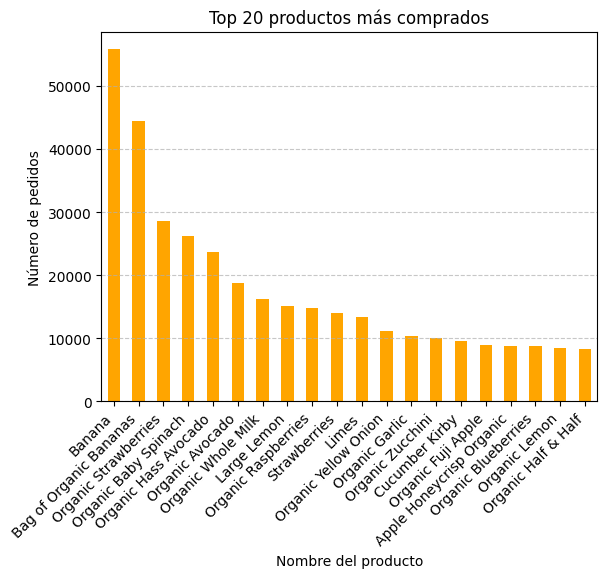

In [ ]:
#grafica
plt.figure(figsize=(10, 6))
reordered_products.plot(kind='bar', x='product_name', y='order_count', color='orange', legend=False)
plt.title('Top 20 productos más comprados')
plt.xlabel('Nombre del producto')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

    Los resultados obtenidos nos muestran los productos más frecuentemente reordenados por los usuarios. Esto refleja los artículos de mayor recurrencia en las compras, indicando que son productos esenciales o de alta demanda, estos se encuentran asociados a bienes de consumo recurrente y perecederos, como alimentos básicos y productos de uso diario.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
product_reorder= (
    order_products
    .groupby('product_id')['reordered']
    .mean()
    .reset_index(name='reorder_ratio')
    .merge(products[['product_id', 'product_name']], on='product_id')
    .sort_values('reorder_ratio', ascending=False)
)

product_reorder.head(20)

,product_id,reorder_ratio,product_name
13453,14721,1.0,Bone Strength Take Care
19195,20949,1.0,Vanilla Sandwich Cookies
6136,6723,1.0,Palmiers- Petite
6144,6732,1.0,Naturally Sparkling Mineral Water
41319,45088,1.0,California Dill Pollen & Garlic Goat Cheese & ...
41310,45078,1.0,Pomegranatea
19258,21016,1.0,Parchment Lined 8 in x 3.75 in x 2.5 in Pans
19248,21005,1.0,Peanut Butter Pie Ice Cream
32273,35192,1.0,Chocolate Soy Milk Singles
32277,35197,1.0,Mocha Chocolate Chip Organic Non-Dairy Frozen...


Escribe aquí tus conclusiones

    Esto indica los productos esenciales o de alta satisfacción para los usuarios, entre los cuales encontramos alimentos básicos como frutas, lácteos o productos de limpieza, así también encontramos los productos con bajas tasas de reorden podrían ser artículos de compra única, productos de temporada o aquellos que no cumplen con las expectativas de los clientes. Esto puede ayudar a segmentar los productos en categorías como "alta recurrencia" y "baja recurrencia".

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

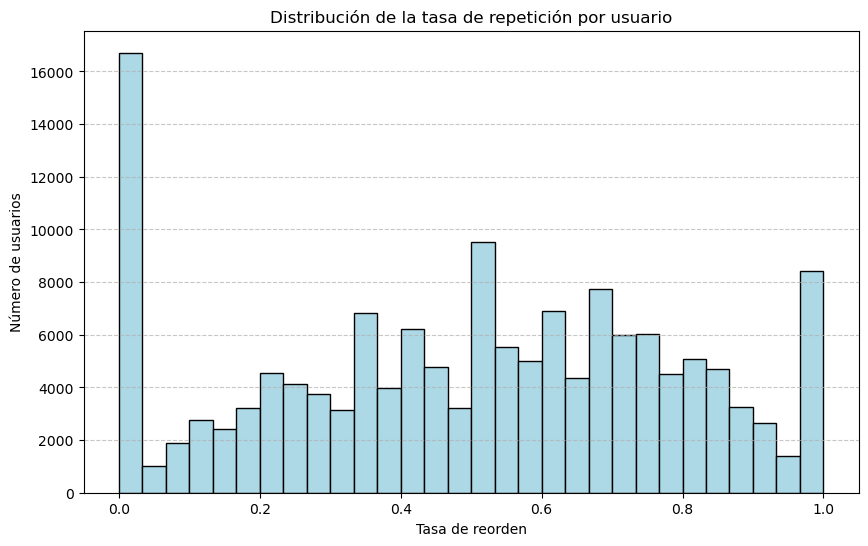

In [65]:
user_reorder_ratio = (
    order_products.merge(orders[['order_id', 'user_id']], on='order_id')
    .groupby('user_id')['reordered']
    .mean()
    .reset_index(name='reorder_ratio')
)

user_reorder_ratio.head(10)

# Graficar la distribución de la tasa de repetición  por usuario
plt.figure(figsize=(10, 6))
plt.hist(user_reorder_ratio['reorder_ratio'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribución de la tasa de repetición por usuario')
plt.xlabel('Tasa de reorden')
plt.ylabel('Número de usuarios')    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

    Calculamos la proporción de productos reordenados por cliente que nos proporciona insights valiosos sobre los patrones de compra individuales, ayudando a personalizar la experiencia del cliente y a diseñar estrategias comerciales más efectivas.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
top_first_products = (
    order_products[order_products['add_to_cart_order'] == 1]
    .groupby('product_id')['order_id']
    .count()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='first_added_count')
    .merge(products, on='product_id')[['product_id', 'product_name', 'first_added_count']]
)

print(top_first_products)

    product_id                 product_name  first_added_count
0        24852                       Banana              15562
1        13176       Bag of Organic Bananas              11026
2        27845           Organic Whole Milk               4363
3        21137         Organic Strawberries               3946
4        47209         Organic Hass Avocado               3390
5        21903         Organic Baby Spinach               3336
6        47766              Organic Avocado               3044
7        19660                 Spring Water               2336
8        16797                 Strawberries               2308
9        27966          Organic Raspberries               2024
10       44632   Sparkling Water Grapefruit               1914
11       49235          Organic Half & Half               1797
12       47626                  Large Lemon               1737
13         196                         Soda               1733
14       38689     Organic Reduced Fat Milk            

<Figure size 1000x600 with 0 Axes>

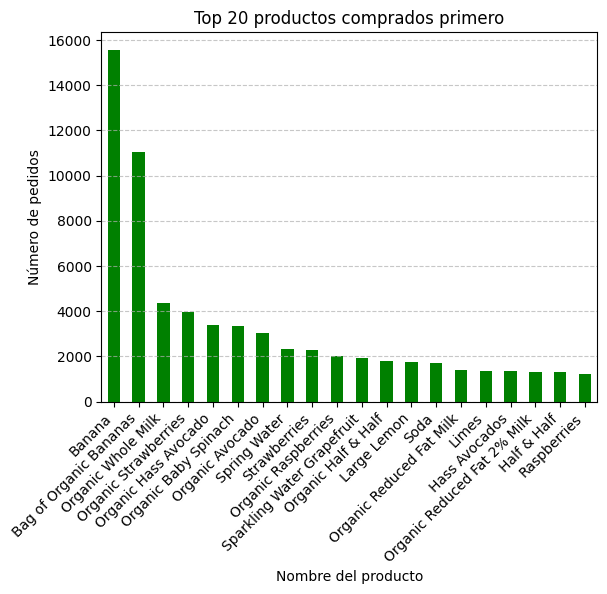

In [ ]:
# Graficar los 20 productos más comprados primero
plt.figure(figsize=(10, 6))
top_first_products.plot(kind='bar', x='product_name', y='first_added_count', color='green', legend=False)
plt.title('Top 20 productos comprados primero')
plt.xlabel('Nombre del producto')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones
    
    Se Identificaron los productos prioritarios en los cuales observamos que la mayoría son alimentos básicos como frutas, leche o productos de uso diario, loa datos nos proporciona información valiosa sobre las prioridades de los clientes al realizar sus compras, podemos encontrar patrones de consumo recurrente en los clientes, lo que puede ser utilizado mejorar la gestión del inventario, diseñar estrategias de marketing más efectivas y optimizar la experiencia del usuario.

### Conclusion general del proyecto:

Como conclusión general de este análisis de datos es que se logró realizar un preprocesamiento efectivo y un análisis exploratorio detallado del conjunto de datos, esto permitió identificar patrones clave en el comportamiento de los usuarios, como:

1. **Patrones de compra recurrentes**: Los usuarios tienden a realizar pedidos en horarios y días específicos, con picos de actividad en las mañanas y los fines de semana. Además, se observó que muchos clientes tienen hábitos de compra semanales o mensuales.

2. **Productos más populares y recurrentes**: Los productos más comprados y reordenados suelen ser alimentos básicos y productos de uso diario, lo que refleja su importancia en las compras recurrentes de los clientes.

3. **Tasas de reorden y prioridades**: Se identificaron productos con altas tasas de reorden, lo que indica su relevancia para los usuarios. También se analizaron los productos que los clientes suelen añadir primero a sus carritos, lo que proporciona información sobre sus prioridades al realizar compras.

4. **Segmentación de clientes**: Se observó que algunos usuarios realizan pedidos con mayor frecuencia que otros, lo que permite segmentar a los clientes en grupos de compradores ocasionales y recurrentes.

5. **Gestión de datos**: Se manejaron valores ausentes y duplicados de manera efectiva, asegurando que los datos estuvieran limpios y listos para el análisis.

    En general, este análisis proporciona insights valiosos que pueden ser utilizados para mejorar la experiencia del cliente, optimizar la gestión del inventario y diseñar estrategias de marketing personalizadas. Además, los hallazgos pueden ayudar a Instacart a comprender mejor los hábitos de compra de sus usuarios y a tomar decisiones basadas en datos para mejorar su plataforma.